In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SE_size_factor = 0.02
area_factor_very_large = 0.01
area_factor_large = 0.001
lam_factor = 3
num_levels = 256
offset = 80
connectivity = 8
weight_all = 0.33
weight_large = 0.33
weight_very_large = 0.33
lam = 27

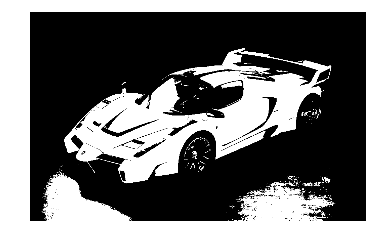

In [4]:
#Load the image
#path_to_image = '../tests/images/Gray/gray.png'
path_to_image = '../tests/images/Gray/gray_data_binarization.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
binarizer = sr.DatadrivenBinarizer( lam=lam,
                 area_factor_large=area_factor_large,
                 area_factor_verylarge=area_factor_very_large,
                 weights=(weight_all, weight_large, weight_very_large),
                 offset=offset,
                 num_levels=num_levels,
                 connectivity=connectivity)

#for now: use simple threshold binarizer
binarizer = sr.ThresholdBinarizer(106)

In [6]:
#our detection object
det = sr.SalientDetector(binarizer=binarizer, SE_size_factor=SE_size_factor, lam_factor=lam_factor, connectivity=connectivity)

27 27


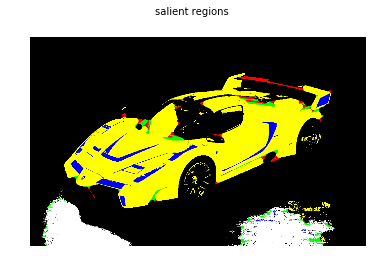

In [11]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
assert det.lam == lam
print det.lam, lam
sr.visualize_elements(img, regions=regions);

{'indentations': 44, 'islands': 37, 'holes': 22, 'protrusions': 24}


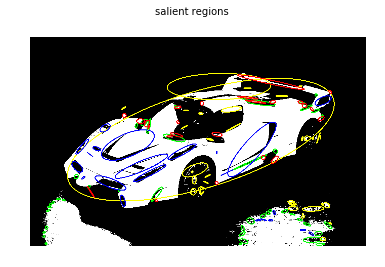

In [16]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'indentations': 43, 'islands': 25, 'holes': 18, 'protrusions': 45}


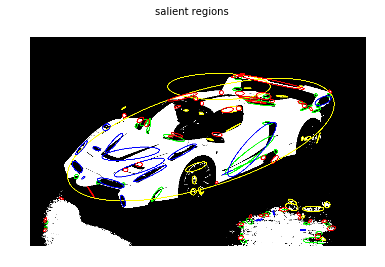

In [18]:
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/images/Gray/gray_dmsra_regions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsra, features_standard_dmsra, features_poly_dmsra = sr.binary_mask2ellipse_features(regions_dmsra, 
                                                                                connectivity=connectivity)
print(num_regions_dmsra)
sr.visualize_elements_ellipses(img, features_standard_dmsra);

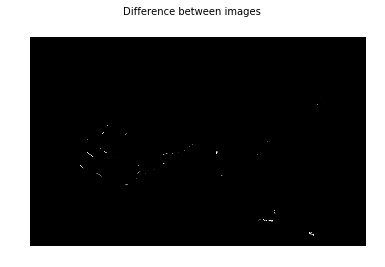

False


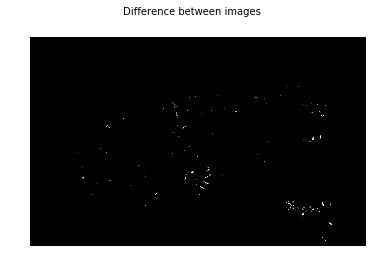

False


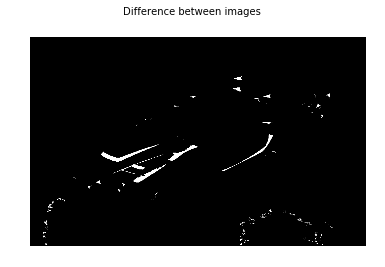

False


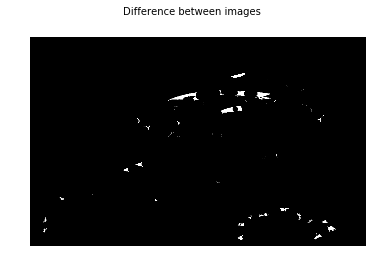

False


In [17]:
print sr.image_diff(regions['holes'], holes_true)
print sr.image_diff(regions['islands'], islands_true)
print sr.image_diff(regions['indentations'], indents_true)
print sr.image_diff(regions['protrusions'], prots_true)

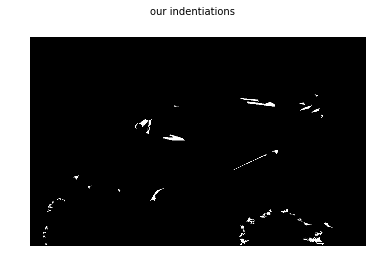

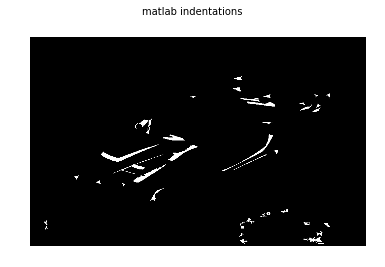

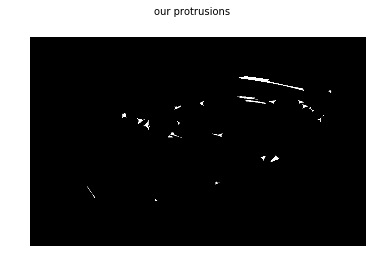

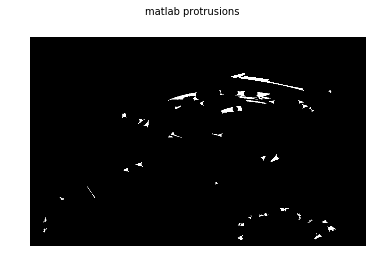

In [28]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)